In [13]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

In [57]:
M= pd.read_csv("train.csv")

df = pd.DataFrame(M)

df = df[np.isfinite(df['Age'])]
df = df[np.isfinite(df['Fare'])]
columns_for_differencing = ['PassengerId','Name','Ticket','Cabin','Embarked','Sex']
X_train= df.copy()[df.columns.difference(columns_for_differencing)]
X_traind=X_train[X_train.Survived == 0]
X_trains=X_train[X_train.Survived == 1]
X_traind=X_traind.values
X_trains=X_trains.values
print(X_train)

      Age      Fare  Parch  Pclass  SibSp  Survived
0    22.0    7.2500      0       3      1         0
1    38.0   71.2833      0       1      1         1
2    26.0    7.9250      0       3      0         1
3    35.0   53.1000      0       1      1         1
4    35.0    8.0500      0       3      0         0
6    54.0   51.8625      0       1      0         0
7     2.0   21.0750      1       3      3         0
8    27.0   11.1333      2       3      0         1
9    14.0   30.0708      0       2      1         1
10    4.0   16.7000      1       3      1         1
11   58.0   26.5500      0       1      0         1
12   20.0    8.0500      0       3      0         0
13   39.0   31.2750      5       3      1         0
14   14.0    7.8542      0       3      0         0
15   55.0   16.0000      0       2      0         1
16    2.0   29.1250      1       3      4         0
18   31.0   18.0000      0       3      1         0
20   35.0   26.0000      0       2      0         0
21   34.0   

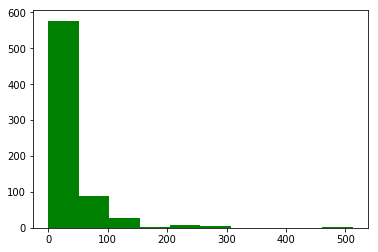

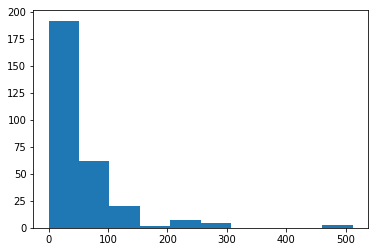

In [64]:

plt.hist(X_train[:,1],color='green') #indicates that lower class passengers were more
plt.show()
plt.hist(X_trains[:,1])
plt.show()

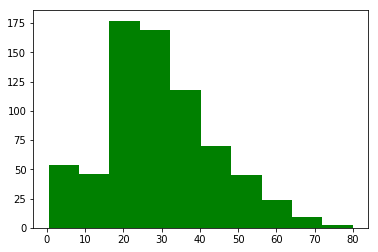

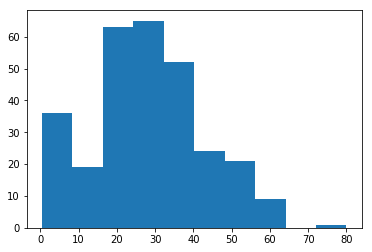

In [65]:
plt.hist(X_train[:,0],color='green') #AGE
# print(X_trains[:,0])
plt.show()
plt.hist(X_trains[:,0])
plt.show()

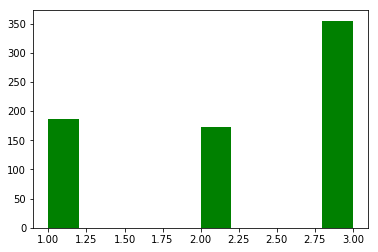

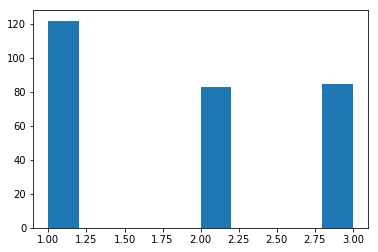

In [66]:
plt.hist(X_train[:,3],color='green') #class
# print(X_trains[:,0])
plt.show()
plt.hist(X_trains[:,3])
plt.show()

In [4]:
n=6
X_traind1=X_traind[:,0:n]
X_trains1=X_trains[:,0:n]


# print(len(X_traind1))
c = np.array([[0.00] * n] *714)
v = np.array([[0.0000]*n]*3)



for i in range(0,290):
    for j in range(n):
        c[i][j]=X_trains1[i][j]

for i in range(290,714):
    for j in range(n):
        c[i][j]=X_traind1[i-290][j]

print(c)   
c=c.transpose()
Mcov=np.cov(c)
#print("\ncovariance of given matrix: \n",Mcov,"\n")
E,V=np.linalg.eig(Mcov)#E=eigen value,V=eigen vector
#print("eigen values are: \n",E,"\n")
#print("eigen vectors are: \n",V,"\n")
V=V.transpose()
for i in range(3):
    for j in range(n):
        v[i][j]=V[i][j]
#print("one vector chosen for PCA:\n",v,"\n")
M2=np.matmul(v,c)
M2=M2.transpose()
print(M2)

[[ 38.      71.2833   0.       1.       1.       1.    ]
 [ 26.       7.925    0.       3.       0.       1.    ]
 [ 35.      53.1      0.       1.       1.       1.    ]
 ..., 
 [ 39.      29.125    5.       3.       0.       0.    ]
 [ 27.      13.       0.       2.       0.       0.    ]
 [ 32.       7.75     0.       3.       0.       0.    ]]
[[-72.32940808 -35.88976016  -1.56231852]
 [ -8.63812534 -25.69288519  -0.93902234]
 [-54.06893519 -33.41128756  -1.5481533 ]
 ..., 
 [-30.21272705 -38.01737351  -4.39803192]
 [-13.74563172 -26.56895364  -0.88324298]
 [ -8.6316538  -31.69619519  -1.1465574 ]]


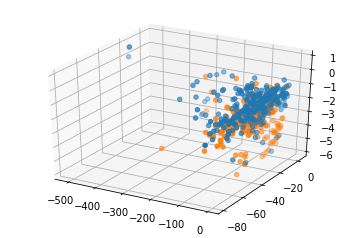

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(M2[0:290,0],M2[0:290,1],M2[0:290,2])
ax.scatter(M2[290:714,0],M2[290:714,1],M2[290:714,2])
plt.show()